# Lab 3: Breast Cancer Coimbra Data Set

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ===== Optional : import other libraries here ===== #
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score
# ===== End of Optional : import other libraries here ===== #

## Problem 1 (a): Download dataset
According to instruction PDF, download [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra) and extract file `dataR2.csv` to directory `./data`.

In [108]:
# Visualization: Load dataset

df = pd.read_csv('data/dataR2.csv')
features_pd = df.copy()
classification = features_pd.pop('Classification').to_numpy().astype(int)
print(">>> example features:\n", features_pd.head(5))
print(">>> example classification:", classification[:5])
print(">>> classification has unique (labels, counts):", np.unique(classification, return_counts=True))
features = features_pd.to_numpy().astype(np.float32)
print(">>> features has shape:", features.shape)

>>> example features:
    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  
0  417.114  
1  468.786  
2  554.697  
3  928.220  
4  773.920  
>>> example classification: [0 0 0 0 0]
>>> classification has unique (labels, counts): (array([0, 1]), array([52, 64]))
>>> features has shape: (116, 9)


## Problem 1 (b): Exploratory data analysis
- Convert `classification` from [1, 2] to [0, 1] and save in new numpy array `classification_converted`.
- Plot scatter matrix with class=0 being red and class=1 being green.
- Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the test set (`training_data`, `test_class`) and the rest of the data as the test set (`test_data`, `test_class`).

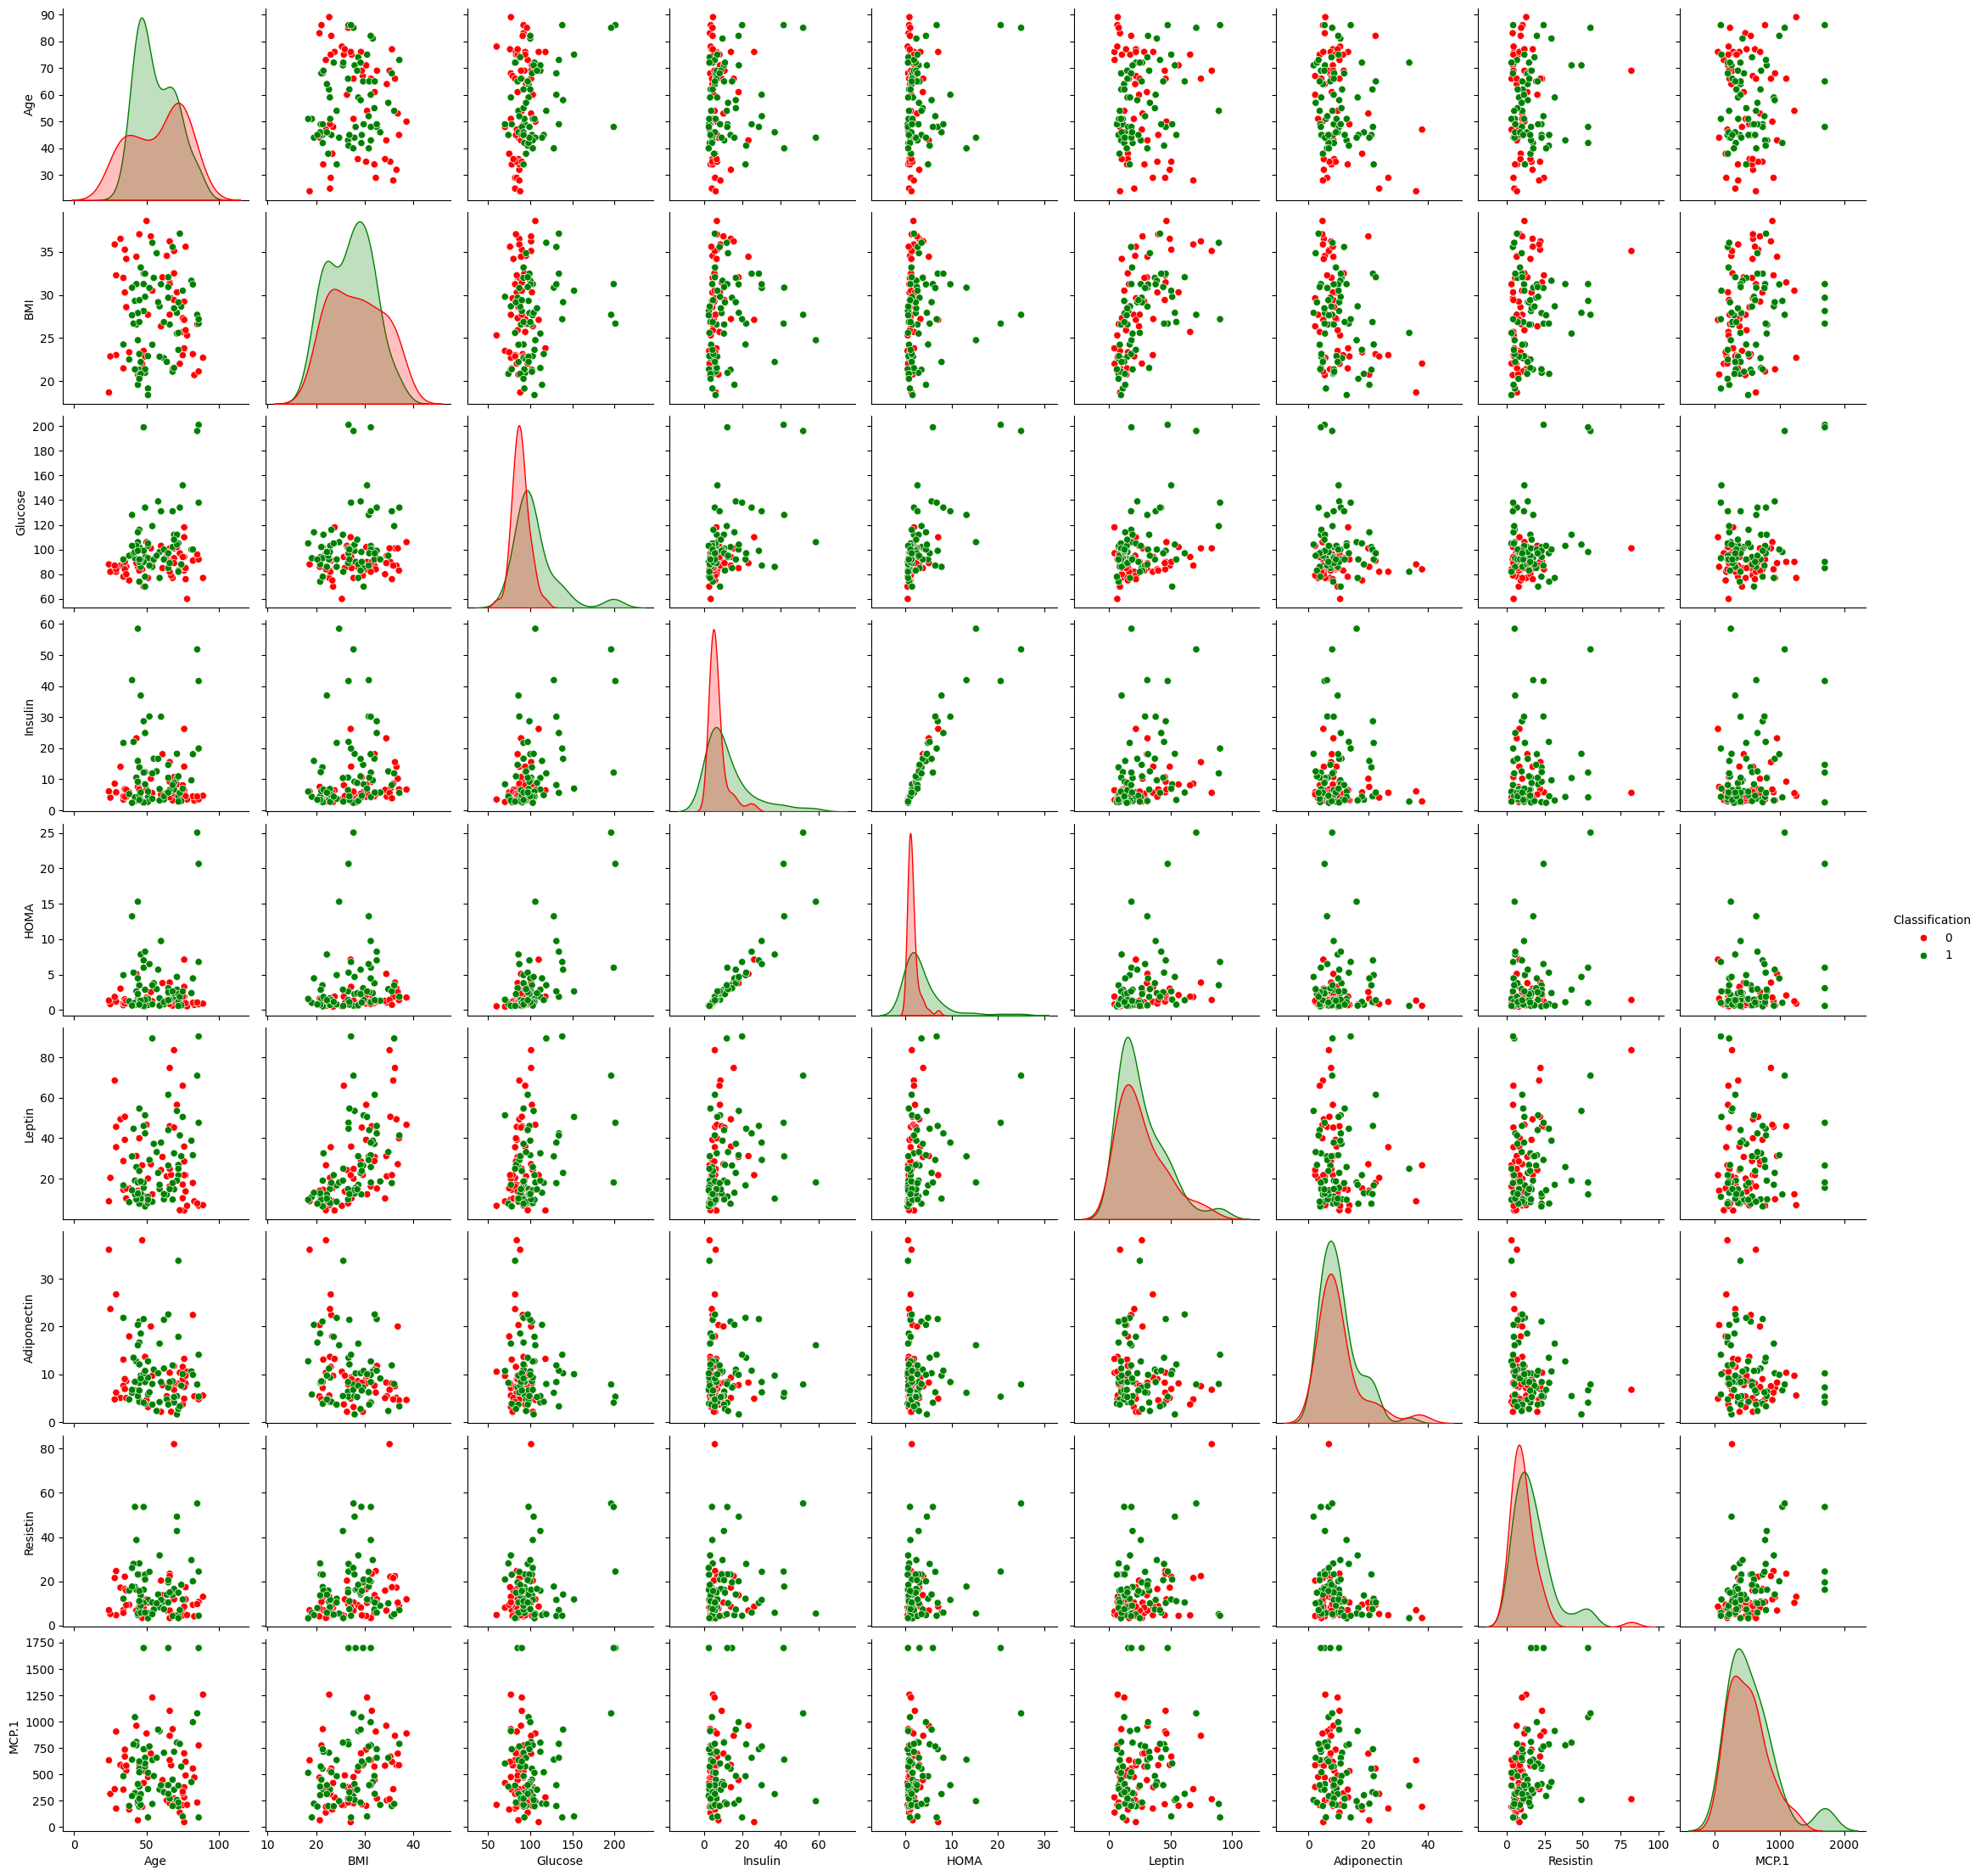

In [109]:
classification_converted = classification.copy()
training_data, training_class = None, None
test_data, test_class = None, None

# ===== Convert classification to 0 or 1 ===== #
# used dropbox data.csv
# ===== End of Convert classification to 0 or 1 ===== #

# ===== Make a colored scatter matrix ===== #
# Hint: use variable features_pd and pd.plotting.scatter_matrix()
class_colors = {0: 'red', 1: 'green'}
sns.pairplot(df, hue='Classification', palette=class_colors)
# ===== End of Make a colored scatter matrix ===== #
# structure from lab3 tutorial
# ===== Divide into training and test set ===== #
class0_training = df[df['Classification'] == 0][:40]
class1_training = df[df['Classification'] == 1][:48]

training_data = pd.concat([class0_training, class1_training])
training_class = training_data['Classification']

training_data = training_data.drop(columns=['Classification'])


test_data = df.drop(training_data.index)
test_class = test_data['Classification']

training_data.reset_index(drop=True, inplace=True)

test_data = test_data.drop(columns=['Classification'])
test_data.reset_index(drop=True, inplace=True)
# ===== End of Divide into training and test set ===== #

In [110]:
# TEST: 1(b)
assert(len(np.where(classification_converted == 0)[0]) == 52)
assert(len(np.where(classification_converted == 1)[0]) == 64)
assert(len(np.unique(classification_converted)) == 2)

assert(training_data.shape[0] == 88 and training_data.shape[1] == 9)
assert(test_data.shape[0] == 28 and test_data.shape[1] == 9)
assert(training_class.shape[0] == 88)
assert(test_class.shape[0] == 28)

print(f">>> Passed P1(b) Tests.")

>>> Passed P1(b) Tests.


# Problem 1 (c): Classification using KNN on Breast Cancer Coimbra Data Set
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `euclidean`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k.

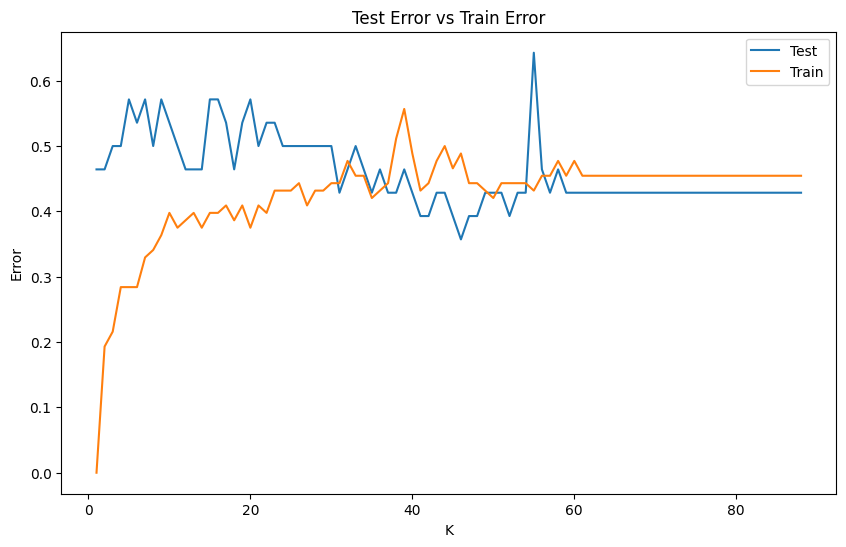

In [111]:
# ===== Classify training/test data ===== #
# Structure and concepts from tutorial
test_error=[]
train_error=[]
k_values=[]

for k in range(88, 0, -1):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric = 'euclidean')
    knn.fit(training_data, training_class)
    training_predict = knn.predict(training_data)
    test_predict = knn.predict(test_data)
    training_error = 1-accuracy_score(training_predict, training_class)
    testing_error = 1-accuracy_score(test_predict, test_class)
    test_error.append(testing_error)
    train_error.append(training_error)
    k_values.append(k)

plt.figure(figsize=(10, 6))
plt.plot(range(88,0,-1), test_error, label="Test")
plt.plot(range(88,0,-1), train_error, label="Train")
plt.title('Test Error vs Train Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.show
plt.legend()
# ===== End of Plot misclassification rate ===== #

In [126]:
# ===== Which k^* is the most suitable k ===== #
# Structure and concepts from Tutorial
# test_error.reverse()
least_error_value = min(test_error)
least_error_index = test_error.index(least_error_value)
best_k = least_error_index + 1
print('Best K Value: {}'.format(best_k))
# ANSWER: K^* is {43}.
# ===== End of Which k^* is the most suitable k ===== #

Best K Value: 43


## Problem 1 (d): Replace the Euclidean metric with the Minkowski distance
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [130]:
# ===== Classify training/test data ===== #
# structure and concepts from tutorial
test_error_rate=[]
train_error_rate=[]
k_arr=[]
for k in range(88, 0, -1):
#     Check the error rate of k for every p
    for p in range(1,5):
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric = 'minkowski', p=p)
        knn.fit(training_data, training_class)
        training_predict = knn.predict(training_data)
        test_predict = knn.predict(test_data)
        training_error = 1-accuracy_score(training_predict, training_class)
        testing_error = 1-accuracy_score(test_predict, test_class)
        test_error_rate.append(testing_error)
        train_error_rate.append(training_error)
        k_arr.append((k,p))
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #

test_error_rate.reverse()
# Take the index of the lowest error and report the k/p value from the k arr
least_error_value_p = min(test_error_rate)
least_error_index_p = test_error_rate.index(least_error_value_p)
best_k_p = k_arr[least_error_index_p]
best_k, best_p = best_k_p
print('Best K Value: {}'.format(best_k))
print('Best P Value: {}'.format(best_p))
# ANSWER: k^* is {78}, p^* is {4}.
# ===== End of Find the optimal (k, p) ===== #

Best K Value: 78
Best P Value: 4


# Extra Credit
- Train kNN module with training data. Set `weights` to `distance`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [131]:
# ===== Classify training/test data ===== #
test_error_rate_weighted=[]
train_error_rate_weighted=[]
k_arr_weighted=[]
for k in range(88, 0, -1):
    for p in range(1,5):
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = 'minkowski', p=p)
        knn.fit(training_data, training_class)
        training_predict_weighted = knn.predict(training_data)
        test_predict_weighted = knn.predict(test_data)
        training_error_weighted = 1-accuracy_score(training_predict_weighted, training_class)
        testing_error_weighted = 1-accuracy_score(test_predict_weighted, test_class)
        test_error_rate_weighted.append(testing_error_weighted)
        train_error_rate_weighted.append(training_error_weighted)
        k_arr_weighted.append((k,p))
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #
test_error_rate_weighted.reverse()
least_error_value_weighted = min(test_error_rate_weighted)
least_error_index_weighted = test_error_rate_weighted.index(least_error_value_weighted)
k_arr_weighted.reverse()
best_k_p_weighted = k_arr_weighted[least_error_index_weighted]
best_k_weighted, best_p_weighted = best_k_p_weighted 
print('Best K Value: {}'.format(best_k_weighted))
print('Best P Value: {}'.format(best_p_weighted))
# ANSWER: k^* is {77}, p^* is {4}.
# ===== End of Find the optimal (k, p) ===== #

Best K Value: 12
Best P Value: 1
